In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(48)

x_2 = np.linspace(0, 2, 30) + np.random.randn(30) #generate some random data points
x_1 = 2*x_2 #this implies perfect collinearity e.g. a correlation of 1
X = np.concatenate([[x_1, x_2]]) #concatenate the two variables to make your predictor matrix
betas = np.array([2.5, -2]) 
y = X.T.dot(betas) + np.random.randn(30) #target variable - random data generated following OLS formula with some noise

model = LinearRegression(fit_intercept=False) 
model.fit(X.T, y) #fit a linear regression model and find the OLS estimates for the beta coefficients
predictions = model.predict(X.T) #find the predicted y values for the OLS estimates

print("Correlation between x_1 and x_2: ", np.corrcoef(x_1, x_2)[0, 1]) #pull out off diagonal element to obtain correlation from the matrix, [1,0] will also work
print('R-Squared Score:', model.score(X.T, y)) 
print('Mean Squared Error: ', mean_squared_error(y, predictions)) #lowest MSE by nature of how Linear Regression works
print('Beta Coefficients:', model.coef_) #OLS estimates for the beta coefficients

Correlation between x_1 and x_2:  0.9999999999999999
R-Squared Score: 0.9482015861945432
Mean Squared Error:  0.9180293327439578
Beta Coefficients: [1.21115132 0.60557566]


The next section will show one of many problems perfect collinearity causes. My conjecture is that there are an infinite number of solutions for my beta coefficients that minimise the MSE. If I can prove that there are an infinite number of solutions, this is a substantial problem for the model because then it's a question of how do I select the beta parameters given that there an infinite number of solutions?

In [3]:
b1 = model.coef_[0] #assign the OLS estimates from the model as variables
b2 = model.coef_[1]

In [4]:
beta_1 = [] 
beta_2 = []

factors = np.linspace(-2, 4, 100) #generate 100 numbers between 0 and 5 

for mult_factor in factors:
    #if I multiply one of my coefficients by some factor, I am essentially changing what my estimate is for my coefficient
    #It becomes a simple case of rearranging the equation with the updated beta coefficient to work out the solution of the other coefficient
    b2_new = mult_factor*b2 #update b2
    
    beta_1.append(((predictions[0] - b2_new*X[1][0])/(b1*X[0][0]))*b1) #pull out the first observation - this will work so long as you keep it consistent
    beta_2.append(b2_new) #append the updated value for beta_2
    
mse = []

for beta1, beta2 in zip(beta_1, beta_2):
    prediction = beta1*X[0] + beta2*X[1] #obtain the predictions for every PAIR of beta coefficients 
    mse.append(mean_squared_error(prediction, y)) #mean squared error for every PAIR of beta coefficients

#I could eyeball my list of MSE values and check if they are all the same or I could take the mean of the MSEs
#Theoretically, if the values are all the same then we would expect the mean of the values to also be the same
np.mean(mse) 

0.9180293327439574

In [5]:
beta_1[:5] 

[2.1195148099559753,
 2.1011640323805993,
 2.0828132548052225,
 2.064462477229846,
 2.0461116996544693]

In [6]:
beta_2[:5]

[-1.2111513199748432,
 -1.1744497648240904,
 -1.1377482096733376,
 -1.1010466545225845,
 -1.0643450993718317]

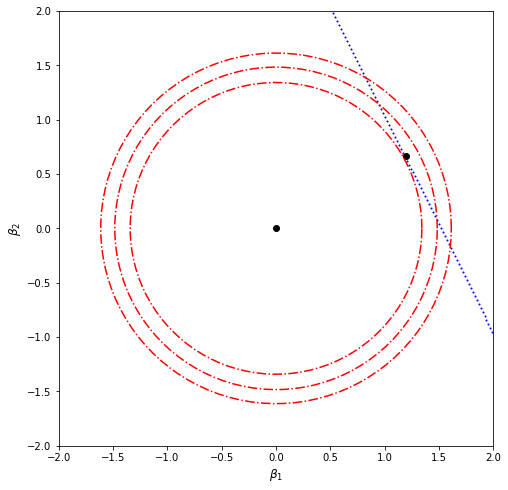

In [7]:
# theta goes from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 100)

# the radius of the first circle - smallest radius
# see the reference at the bottom of the page to see how we can define a circle using cos and sin
r = np.sqrt(1.8)
x_r = r*np.cos(theta)
y_r = r*np.sin(theta)

# second circle
r_2 = np.sqrt(2.2)
x_r2 = r_2*np.cos(theta)
y_r2 = r_2*np.sin(theta)

# third circle
r_3 = np.sqrt(2.6)
x_r3 = r_3*np.cos(theta)
y_r3 = r_3*np.sin(theta)

# create the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.plot(x_r, y_r, c='r', linestyle='-.')
ax.plot(x_r2, y_r2, c='r', linestyle='-.')
ax.plot(x_r3, y_r3, c='r', linestyle='-.')
ax.set_aspect(1)

ax.scatter(x=beta_1, y=beta_2, s=1, c='blue')
ax.scatter([0, 1.2], [0, 0.67], c='black');

#axes
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_xlabel(r'$\beta_1$', fontsize = 12)
ax.set_ylabel(r'$\beta_2$', fontsize = 12)

plt.show()

We have established that perfect collinearity leads to an infinite number of solutions that minimise the MSE. So the question remains is how do we go about solving the problem? 

The plot above should provide some insight into where we are going with this. The blue line represents the different combinations of beta coefficients that minimise the MSE. There are three circles, each with a different radius. Remember the equation of a circle is given by, $X^2$ + $Y^2$ = $R^2$. If we substitute $\beta{_1}$ for X and $\beta{_2}$ for Y, we can map the beta coefficients out into a circle. The blue line goes through all the different circles, which implies that the length of the beta vector of all the combinations is not the same.

Perhaps then, we can use the length of the beta vectors as our criteria for selecting our beta coefficients or in other words, the sum of the squared beta coefficients, $\beta{_1}^2$ + $\beta{_2}^2$? Maybe we select the combination with the smallest length? In this case, we would select the pair of coefficients that touch the inner-most circle (since this has the smallest radius), which is shown by the black dot.

So far we have only discussed the scenario of perfect collinearity. What happens when we have very **strong** but not **perfect** collinearity? We will need to find a way to deal with the trade-off between having a higher MSE with a smaller length of the beta vector and a smaller MSE with a larger length of beta coefficients! 

https://mathopenref.com/coordparamcircle.html